In [ ]:
!pip install tweepy textblob

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Install Required Libraries
!pip install textblob
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Download a Sample Twitter Sentiment Dataset
!wget https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv

# Step 3: Load the Dataset
df = pd.read_csv("train.csv")
df = df[['label', 'tweet']]  # Only keeping necessary columns
df.head()


--2025-04-23 01:35:34--  https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   2.96M  --.-KB/s    in 0.08s   

2025-04-23 01:35:35 (36.5 MB/s) - ‘train.csv’ saved [3103165/3103165]



,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
import re

def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # remove @mentions
    tweet = re.sub(r'#', '', tweet)  # remove hashtag symbol
    tweet = re.sub(r'RT[\s]+', '', tweet)  # remove RT
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)  # remove links
    return tweet

df['clean_tweet'] = df['tweet'].apply(clean_tweet)
df.head()


,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,0,factsguide: society now #motivation,factsguide: society now motivation


In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['clean_tweet'].apply(get_sentiment)
df[['clean_tweet', 'Sentiment']].head()


,clean_tweet,Sentiment
0,when a father is dysfunctional and is so sel...,Negative
1,thanks for lyft credit i can't use cause the...,Positive
2,bihday your majesty,Neutral
3,model i love u take with u all the time in u...,Positive
4,factsguide: society now motivation,Neutral


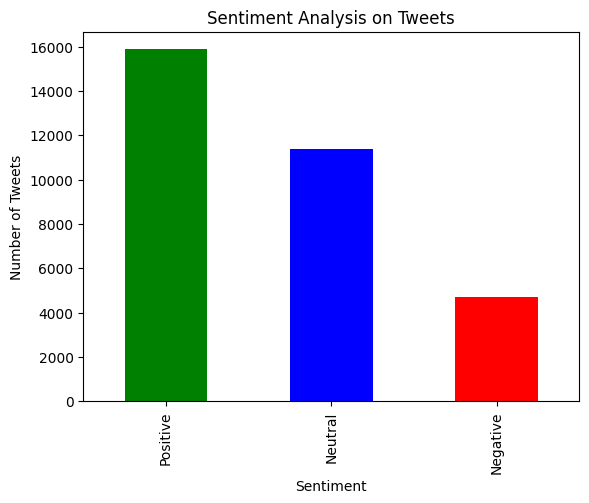

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis on Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [ ]:
from textblob import TextBlob

# Ask user for input
user_input = input("Enter a sentence to analyze sentiment: ")

# Analyze sentiment
analysis = TextBlob(user_input)
polarity = analysis.sentiment.polarity

# Determine sentiment category
if polarity > 0:
    sentiment = "Positive 😊"
elif polarity == 0:
    sentiment = "Neutral 😐"
else:
    sentiment = "Negative 😞"

# Display result
print(f"\nSentiment: {sentiment}")
print(f"Polarity Score: {polarity}")


Enter a sentence to analyze sentiment: "I’m really happy with my purchase, totally worth it."


In [ ]:
# Step 1: Install Required Library
!pip install textblob

# Step 2: Import Library
from textblob import TextBlob

# Step 3: Function to Get Sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return "Positive 😊"
    elif polarity == 0:
        return "Neutral 😐"
    else:
        return "Negative 😞"

# Step 4: Get Input from the User
while True:
    user_input = input("\nEnter a sentence to analyze sentiment (or type 'exit' to stop): ")
    if user_input.lower() == 'exit':
        print("Thank you for using the Sentiment Analyzer!")
        break

    sentiment = analyze_sentiment(user_input)
    print(f"Sentiment: {sentiment}")


Sentiment: Neutral 😐
Sentiment: Positive 😊
Sentiment: Negative 😞
